### SCS3201 Machine Learning and Neural Computing
Assignment 01

IndexNu:18001505

# **Predict the number of O-rings on a given flight from Number experiencing thermal distress and Launch temperature**

Dataset: https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring

Attribute Information:

1. Number of O-rings at risk on a given flight
2. Number experiencing thermal distress
3. Launch temperature (degrees F)
4. Leak-check pressure (psi)
5. Temporal order of flight


## Import the required libraries

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize

## Load the data


In [ ]:
data = np.genfromtxt('https://raw.githubusercontent.com/Jihani-31/dataset/main/o-ring-erosion-only.data')
data.shape   #size of data set

(23, 5)

## Normalize Data

In [ ]:
 data = normalize(data, axis=0)

## Seperate Data into X and Y

In [ ]:
X = data[:, 1:]  
Y = data[:, 0:1]   

## Visualize the Data

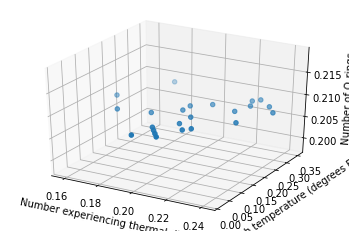

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 1]
ys = X[:, 3]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Number experiencing thermal distress')
ax.set_ylabel('Launch temperature (degrees F)')
ax.set_zlabel('Number of O-rings')

plt.show()

## Hyperparameters

In [ ]:
learning_rate = 0.005
max_iteration = 500

## Parameters

In [ ]:
theta = np.zeros((data.shape[1], 1))

## Hypothesis

In [ ]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

## Loss Function

In [ ]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

## Calculate Gradients

In [ ]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

## Gradient Descent

In [ ]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

## Train Model

In [ ]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.02149566103605415
iteration :  100  loss :  0.006977711190294965
iteration :  200  loss :  0.002276542837991225
iteration :  300  loss :  0.000753999694028951
iteration :  400  loss :  0.00026068468334552954


## Optimal values of Parameters using Trained Model

In [ ]:
theta

array([[0.17478103],
       [0.01671637],
       [0.03629114],
       [0.03247049],
       [0.03089596]])

## Cost vs Iteration Plots

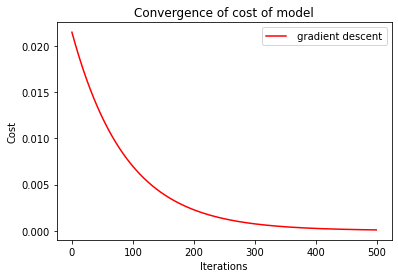

In [ ]:

fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')    
ax.legend(loc='upper right', labels=[' gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Convergence of cost of model')  

plt.show()

It seems graph is convergence.Graph Converge around 100